In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import glob
import os
import csv
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd

# Create a list to store the 2D arrays
array_list = []
anno_list=[]
# Generate 400 individual 2D arrays of size 18000x5 (replace this with your data generation)
labels=("run","walk","fall","sitdown","standup")


for label in labels:
  print(label)
  raw_folder = '/content/drive/MyDrive/Colab Notebooks/Dataset/Data/';
  data_path_pattern = os.path.join(raw_folder, 'input_*' + str(label) + '*.csv')
  input_csv_files = sorted(glob.glob(data_path_pattern))
  annot_csv_files = [os.path.basename(fname).replace('input_', 'annotation_') for fname in input_csv_files]
  annot_csv_files = [os.path.join(raw_folder, fname) for fname in annot_csv_files]
  index=0
  for csi_file, anno_file in zip(input_csv_files, annot_csv_files):
    data = pd.read_csv(csi_file,header=None).values
    amp = data[0:1700,1:91]
    array_list.append(amp)
    index+=1
    print(index)

  for _ in range (len(input_csv_files)):
    anno_list.append(str(label))


# Stack the list of 2D arrays along the first dimension to create a 3D array
input_array = np.stack(array_list)
anno_array = np.stack(anno_list)


run
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
walk
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
fall
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
sitdown
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
standup
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

In [ ]:
input_array.shape

(398, 1700, 90)

In [ ]:
anno_array.shape

(398,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_array,anno_array,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:


activity_labels=["fall","sitdown","standup","walk","run"]
label_encoder=LabelEncoder()
label_encoder.fit(activity_labels)
Y_train_encoded = label_encoder.transform(y_train)
Y_test_encoded = label_encoder.transform(y_test)
num_classes = len(activity_labels)
Y_train_onehot = to_categorical(Y_train_encoded)
Y_test_onehot = to_categorical(Y_test_encoded)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense

# Create the CNN-GRU model
def create_model():
    model = Sequential()

    # CNN part
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1700, 90)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # GRU part
    model.add(GRU(128, return_sequences=True))
    model.add(GRU(64))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))  # Output probabilities for each class

    return model

model = create_model()

# Parameters

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train_onehot, validation_data=(X_test, Y_test_onehot), epochs=100, batch_size=32)  # Use appropriate batch size


Epoch 1/100
10/10 [==============================] - 19s 1s/step - loss: 1.6206 - accuracy: 0.2201 - val_loss: 1.5651 - val_accuracy: 0.3500
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 1.5152 - accuracy: 0.3868 - val_loss: 1.4956 - val_accuracy: 0.4625
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 1.4527 - accuracy: 0.4497 - val_loss: 1.4659 - val_accuracy: 0.4125
Epoch 4/100
10/10 [==============================] - 11s 1s/step - loss: 1.3905 - accuracy: 0.5377 - val_loss: 1.4125 - val_accuracy: 0.5375
Epoch 5/100
10/10 [==============================] - 14s 1s/step - loss: 1.3410 - accuracy: 0.5440 - val_loss: 1.3535 - val_accuracy: 0.5750
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 1.3012 - accuracy: 0.5660 - val_loss: 1.3244 - val_accuracy: 0.5625
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 1.2493 - accuracy: 0.5566 - val_loss: 1.2494 - val_accuracy: 0.5875
Epoch 8/100
1

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test_onehot)
print(f"Test accuracy: {test_accuracy}")

# Make predictions
predictions = model.predict(X_test)

3/3 [==============================] - 1s 192ms/step - loss: 0.6340 - accuracy: 0.8500
Test accuracy: 0.8500000238418579
3/3 [==============================] - 2s 274ms/step


3/3 [==============================] - 1s 282ms/step


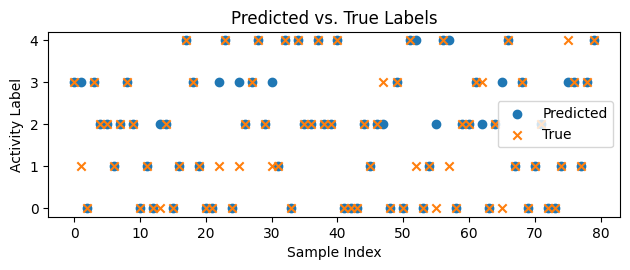

In [ ]:
import matplotlib.pyplot as plt
# Get predicted probabilities for each class
predicted_probs = model.predict(X_test)

# Get predicted labels (using np.argmax)
predicted_labels = np.argmax(predicted_probs, axis=1)

plt.subplot(2, 1, 2)
plt.scatter(range(len(predicted_labels)), predicted_labels, label='Predicted', marker='o')
plt.scatter(range(len(Y_test_encoded)), Y_test_encoded, label='True', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Activity Label')
plt.title('Predicted vs. True Labels')
plt.legend()

plt.tight_layout()
plt.show()


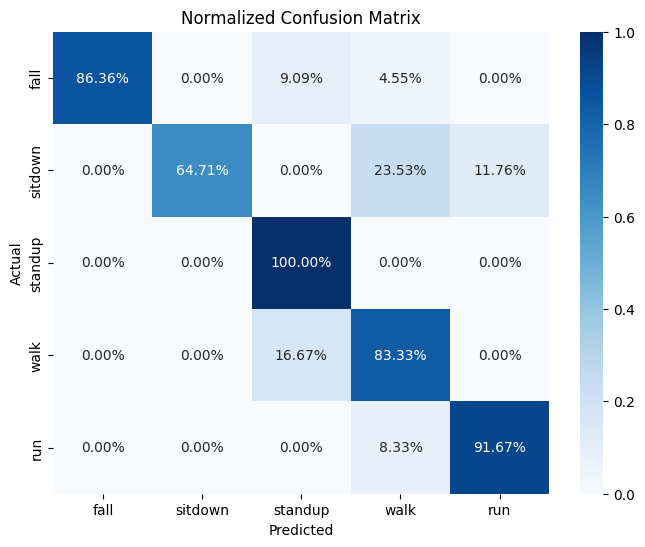

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(Y_test_encoded,predicted_labels, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap='Blues', fmt=".2%", xticklabels=["fall","sitdown","standup","walk","run"], yticklabels=["fall","sitdown","standup","walk","run"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score , precision_score,classification_report,accuracy_score
# Calculate evaluation metrics
accuracy = accuracy_score(Y_test_encoded, predicted_labels)
f1 = f1_score(Y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(Y_test_encoded, predicted_labels, average='weighted')
precision = precision_score(Y_test_encoded, predicted_labels, average='weighted')


plt.show()

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

Accuracy: 0.85
F1 Score: 0.85
Recall: 0.85
Precision: 0.88


In [ ]:
class_report = classification_report(Y_test_encoded, predicted_labels)
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       1.00      0.65      0.79        17
           2       0.81      1.00      0.89        17
           3       0.62      0.83      0.71        12
           4       0.85      0.92      0.88        12

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.84        80
weighted avg       0.88      0.85      0.85        80



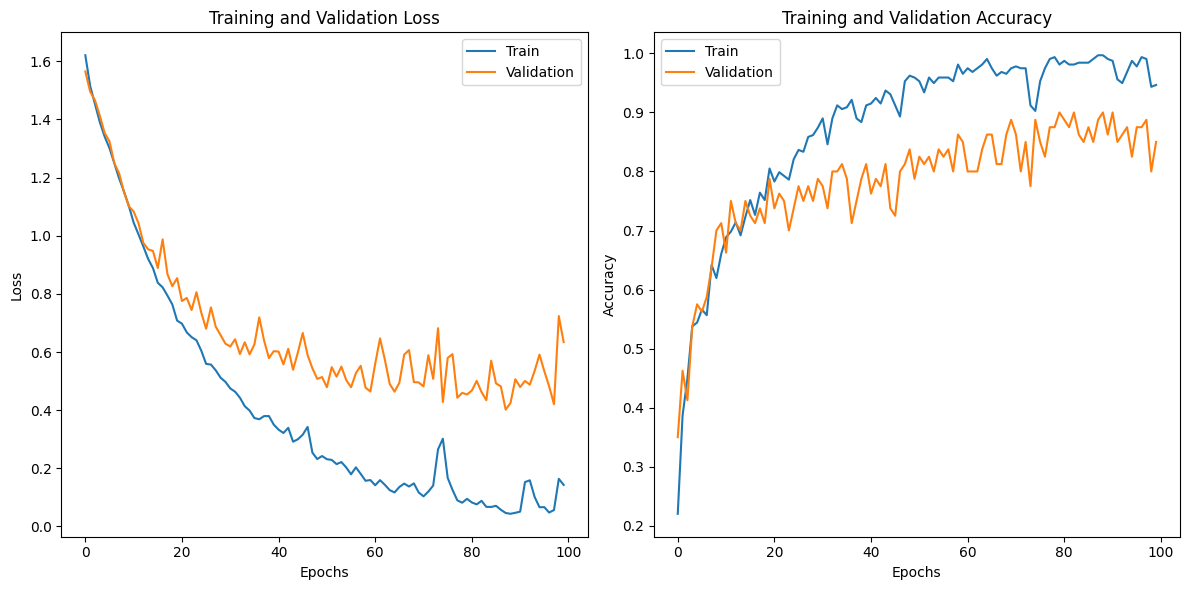

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save('my_model_CNN-gru.h5')